![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.0em;">

<b>Questão 1:</b> <br>

a) Faça gráficos dos estados estacionários (X ∞ (V )) e das constantes de tempo (τ X (V ))
versus V para as variáveis de gating do modelo de Connor e Stevens (X = {n, m, h, a, b}) <br>
</div>

In [1]:
import numpy as np
import pylab as plt

from Connor_Stevens import ConnorStevens

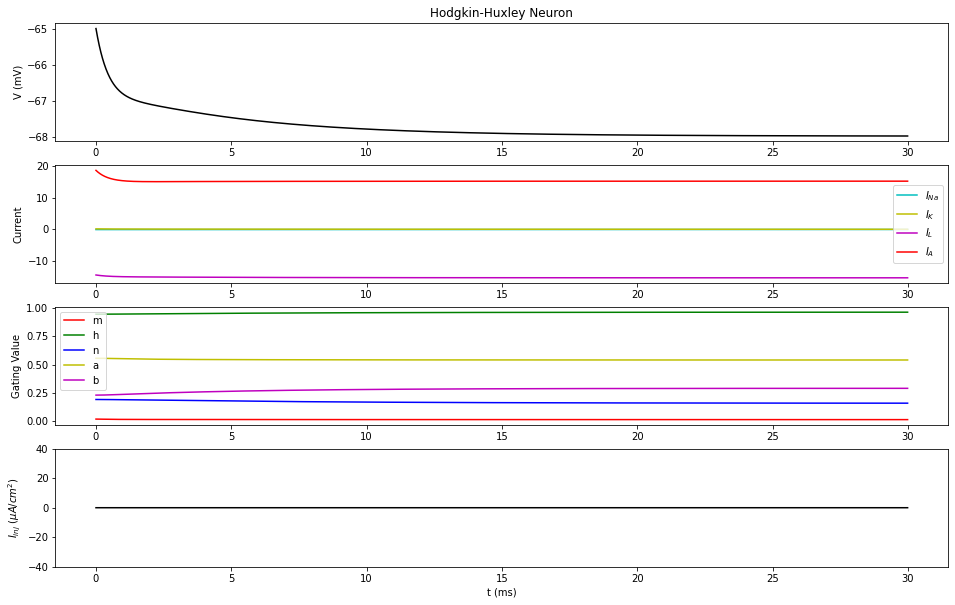

In [2]:
runner = ConnorStevens(exp_time=30)
_ = runner.run(J=[0], times=[(0, 0)])


<div style="font-family: Times New Roman; font-size: 1.0em;">
b) Use as condições iniciais dadas por Ermentrout: V (0) = −67, 976 mV; n(0) = 0, 1558;
m(0) = 0, 01; h(0) = 0, 965; a(0) = 0, 5404; e b(0) = 0, 2885. Resolva o sistema de EDOs
do modelo de Connor e Stevens usando o método de Runge-Kutta de quarta ordem
com passo de tempo de 0,01 ms. Simule as equações do modelo de Connor-Stevens por
um perı́odo de 200 ms começando das condições iniciais dadas acima e em t = 60 ms
injete uma densidade de corrente J pelos restantes 140 ms. Faça isso para quatro valores
diferentes de J: 5, 10, 15 e 20 µA/cm 2 . Faça gráficos de V , n, m, h, a e b em função de
t para essas quatro densidades de corrente injetada. <br>
</div>

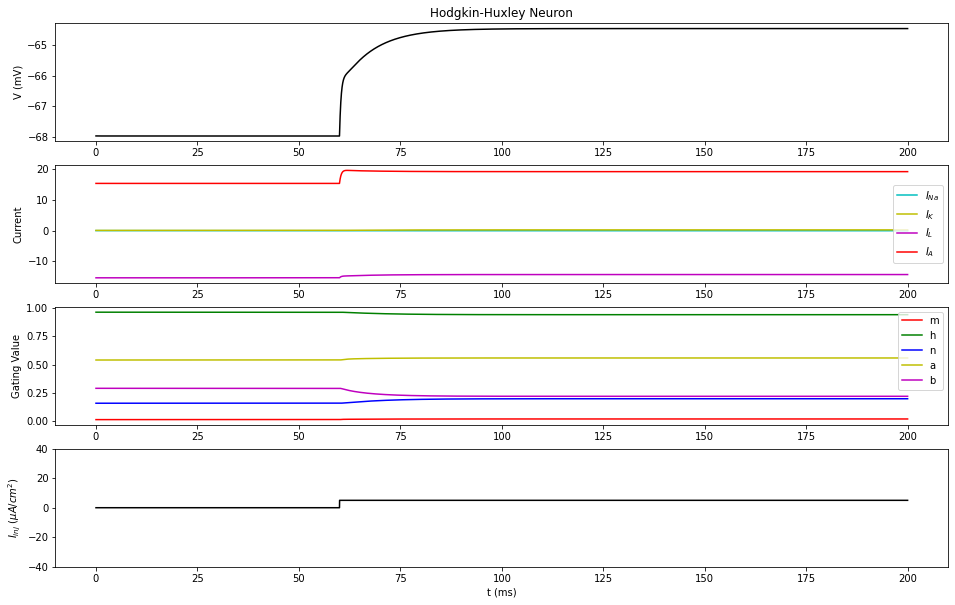

Corrent injetada: 5


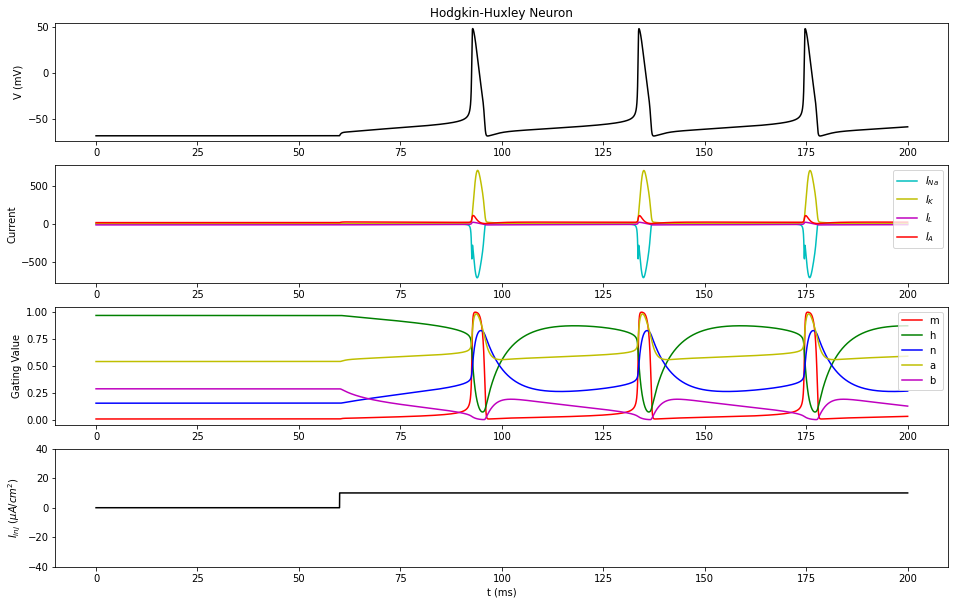

Corrent injetada: 10


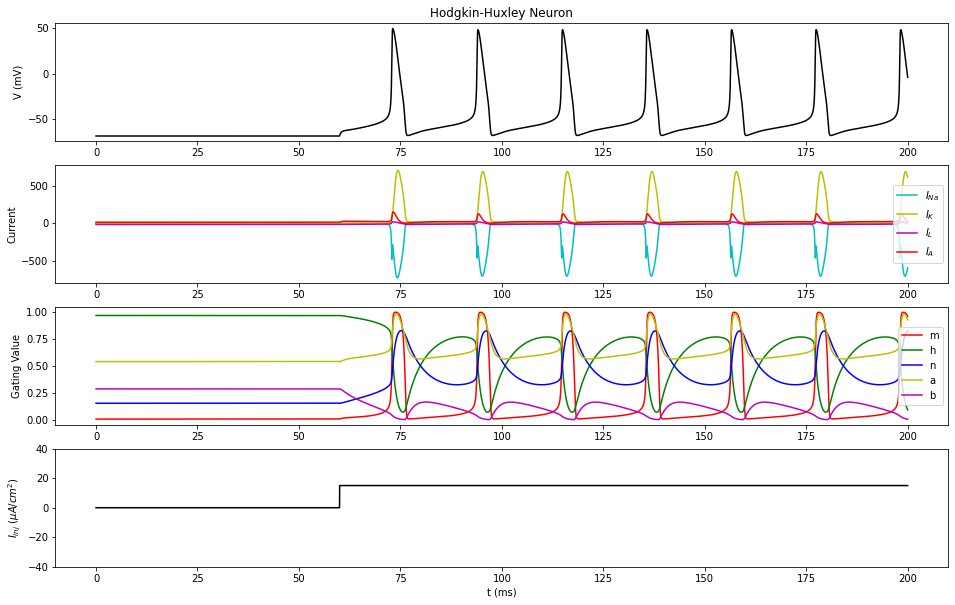

Corrent injetada: 15


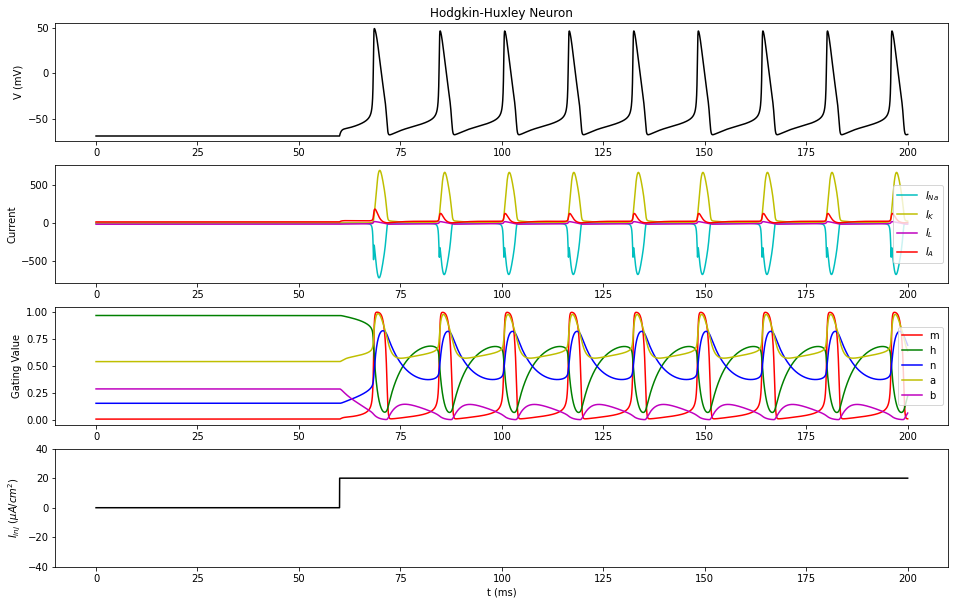

Corrent injetada: 20


In [10]:
runner = ConnorStevens(exp_time=200)

for j in range(5, 25, 5):
    _ = runner.run(J=[j], times=[(60, 200)], V0=-67.976)
    print(f"Corrent injetada: {j}")


<div style="font-family: Times New Roman; font-size: 1.0em;">
c) Calcule a taxa de disparos do modelo (dividindo o número de disparos pelos 140 ms de
corrente aplicada) para densidades de corrente variando de 8 a 10 µA/cm² em passos
de 0,2 µA/cm² e produza um gráfico f-I com os valores obtidos. Como o gráfico f-I se
compara com o gráfico f-I do modelo de Hodgkin-Huxley construı́do na primeira lista? <br>

Em termos de comportamento geral deste gráfico f-I, o modelo de Connor-Stevens permanece basicamente o mesmo, a quantidade de disparos irá aumentar até um limite máximo e depois não haverá mais disparos.
</div>

In [15]:
def get_number_of_action_potencial(V):
    """ Get number of action potentials.

    Parameters
    ----------
    V : array
    The return from Connor & Stevens run Voltage vector.
    """
    V_threshold = V[V>47]
    asign = np.sign(V_threshold[:-1] - V_threshold[1:])
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    return len(signchange[signchange == 1])/2

In [22]:
runner = ConnorStevens(exp_time=200)

current_inj = np.arange(8, 10.1, 0.2)
all_activation_potencials = []

for j in current_inj:
    V, m, h, n, ina, ik, il, ia, i_inj_values = runner.run(J=[j], times=[(60, 200)], V0=-67.976, plot=False)
    all_activation_potencials.append(get_number_of_action_potencial(V))
    print(f"Corrent injetada: {j}")

Corrent injetada: 8.0
Corrent injetada: 8.2
Corrent injetada: 8.399999999999999
Corrent injetada: 8.599999999999998
Corrent injetada: 8.799999999999997
Corrent injetada: 8.999999999999996
Corrent injetada: 9.199999999999996
Corrent injetada: 9.399999999999995
Corrent injetada: 9.599999999999994
Corrent injetada: 9.799999999999994
Corrent injetada: 9.999999999999993


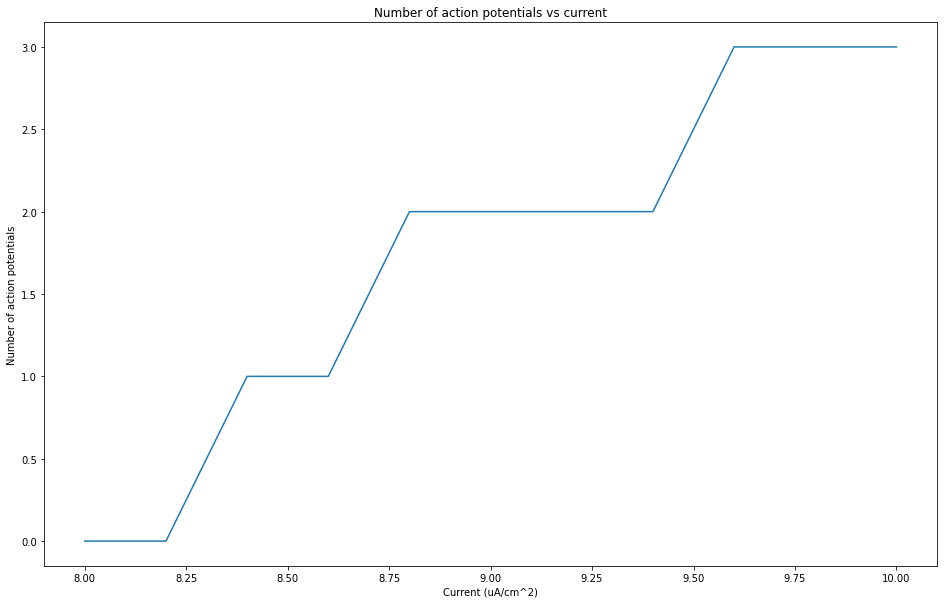

The max number of action potencials was 3.0 Hz
The min number of action potencials was 0.0 Hz


In [23]:
plt.figure(figsize=(16, 10))
plt.plot(current_inj, np.array(all_activation_potencials))
plt.xlabel("Current (uA/cm^2)")
plt.ylabel("Number of action potentials")
plt.title("Number of action potentials vs current")
plt.show()
print(f"The max number of action potencials was {max(all_activation_potencials)} Hz")
print(f"The min number of action potencials was {min(all_activation_potencials)} Hz")


<div style="font-family: Times New Roman; font-size: 1.0em;">
d) Outra maneira de determinar a taxa de disparos de um neurônio em resposta a uma
corrente é calculando o tempo entre o inı́cio do estı́mulo e o primeiro disparo do neurônio
(chamado de latência do primeiro disparo). A taxa de disparos neste caso é dada pelo
inverso da latência do primeiro disparo. Determine a curva f-I para o modelo de Connor-
Stevens por esse método para as mesmas correntes usadas no item anterior.
</div>

In [21]:
def get_number_of_action_potencial_by_time(V):
    """ Get number of action potentials.

    Parameters
    ----------
    V : array
    The return from Connor & Stevens run Voltage vector.
    """
    max_curent_idx = np.argmax(V)
    
    latency = max_curent_idx/100 - 60

    return latency if latency == 0 else 1/latency

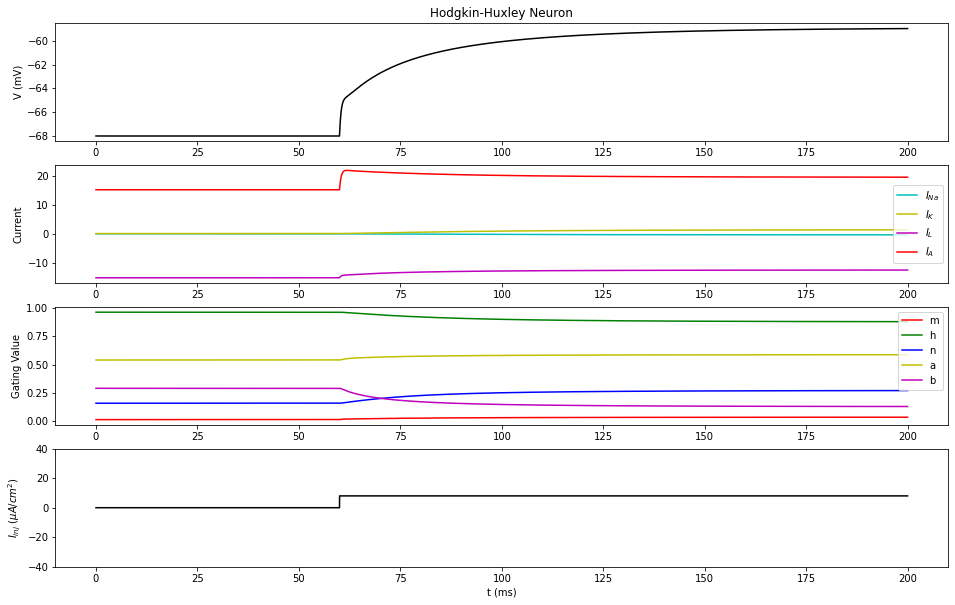

Corrent injetada: 8.0


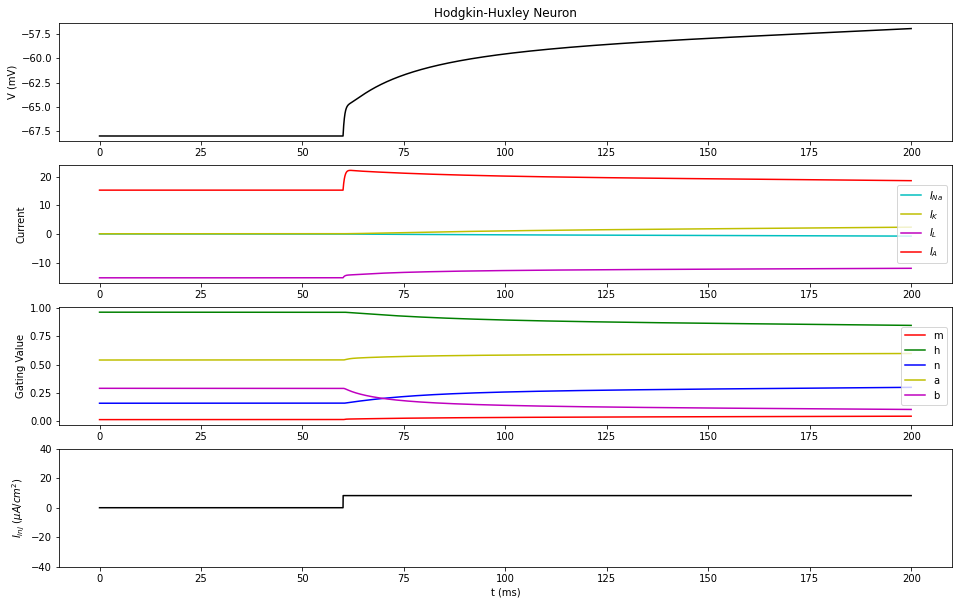

Corrent injetada: 8.2


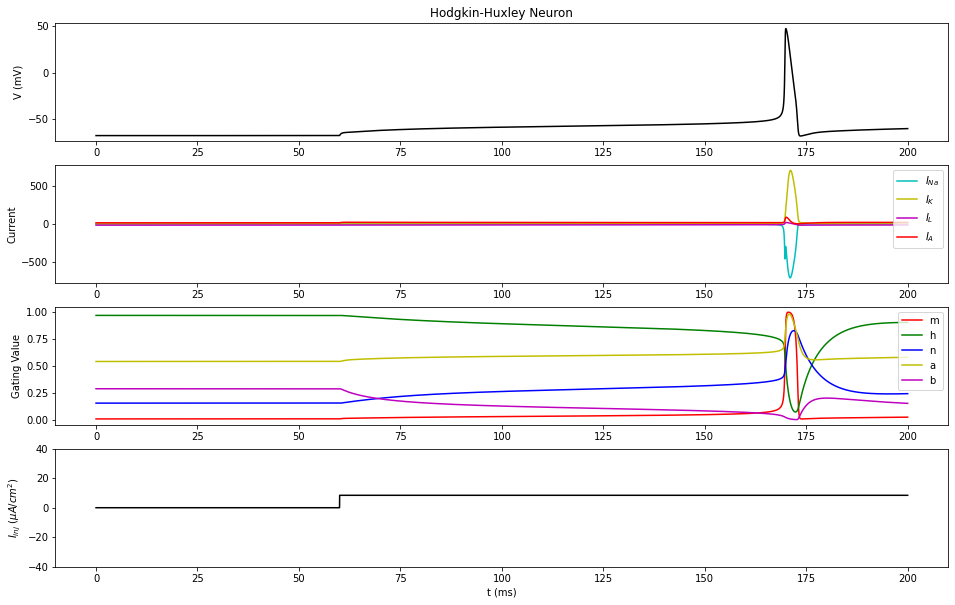

Corrent injetada: 8.399999999999999


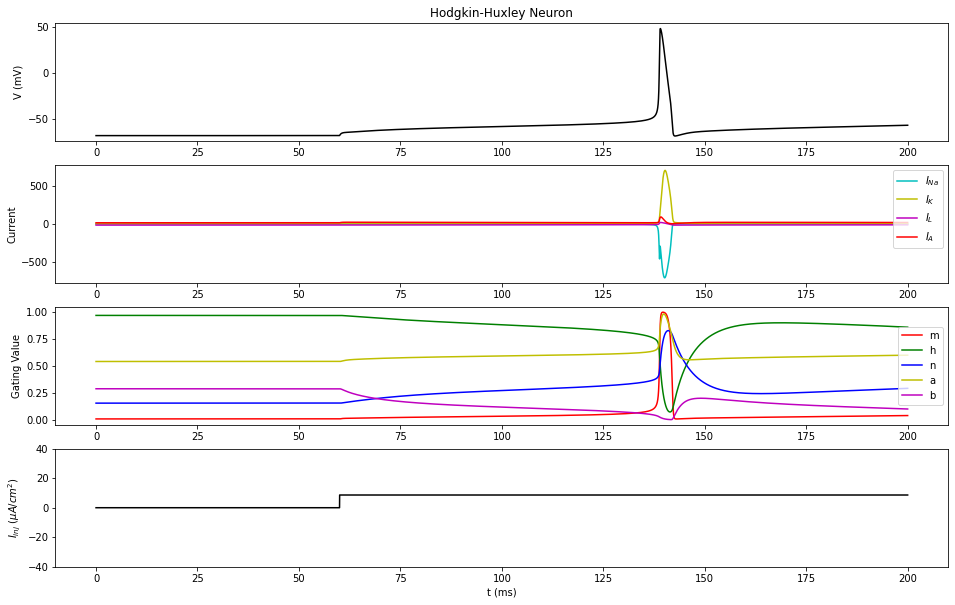

Corrent injetada: 8.599999999999998


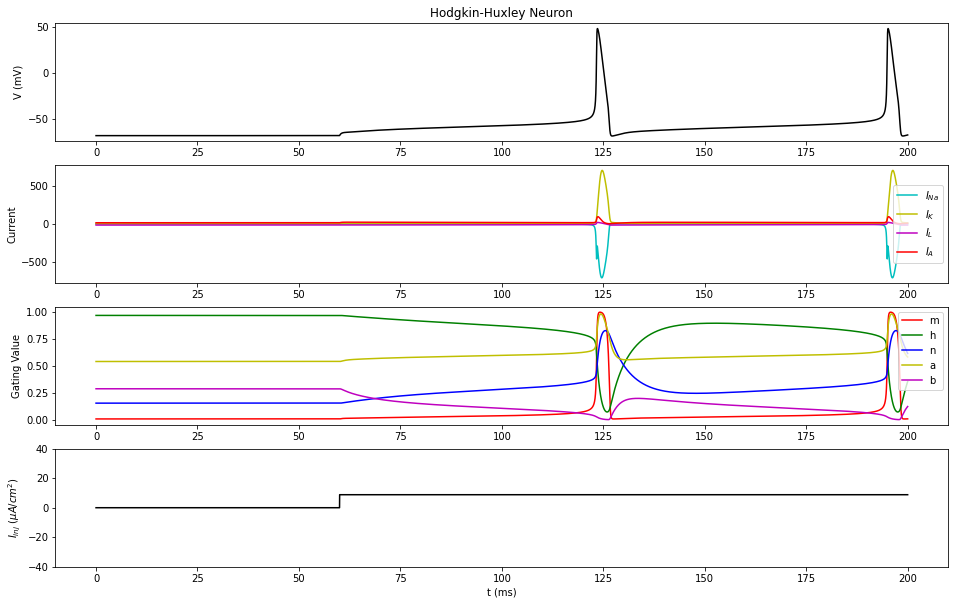

Corrent injetada: 8.799999999999997


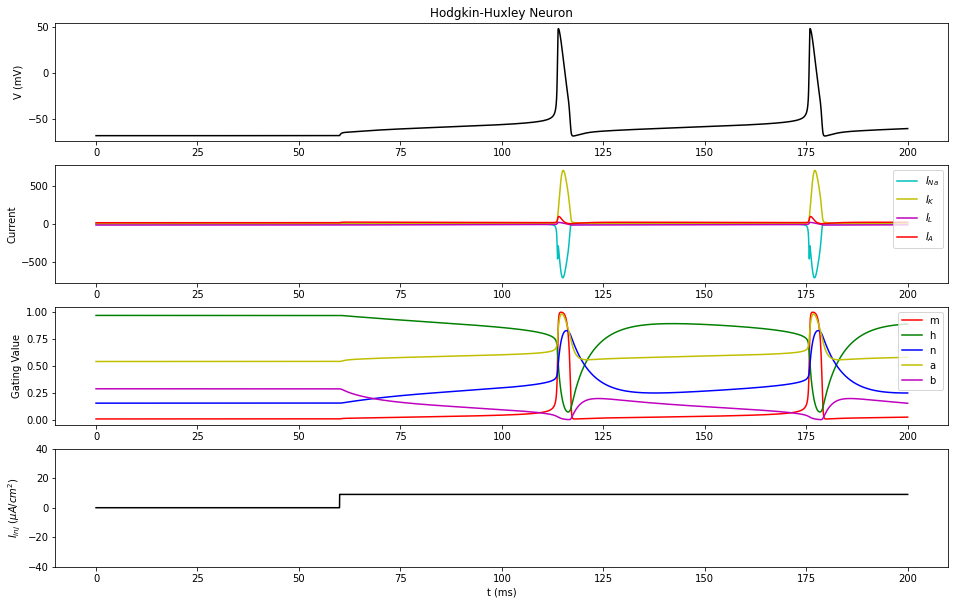

Corrent injetada: 8.999999999999996


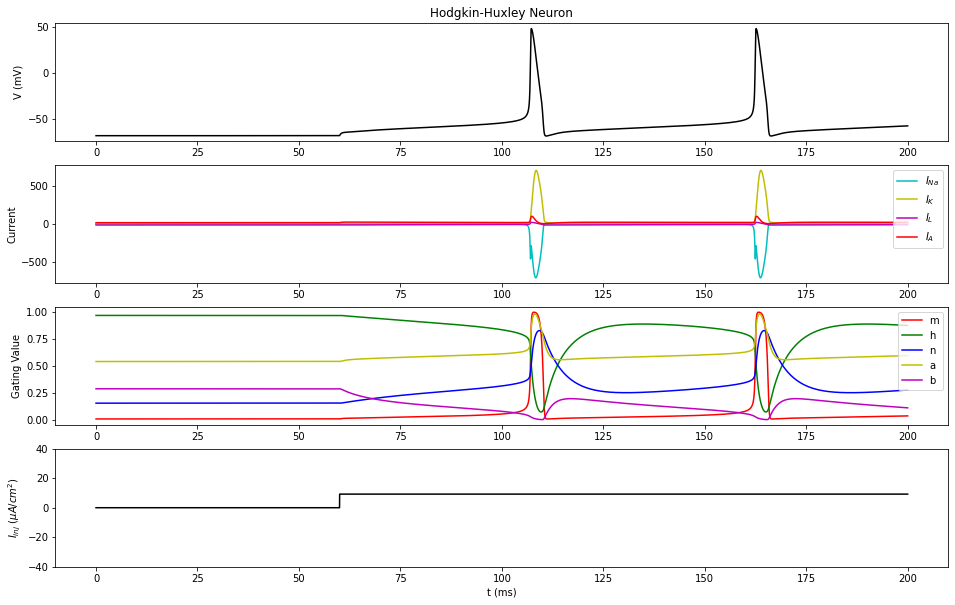

Corrent injetada: 9.199999999999996


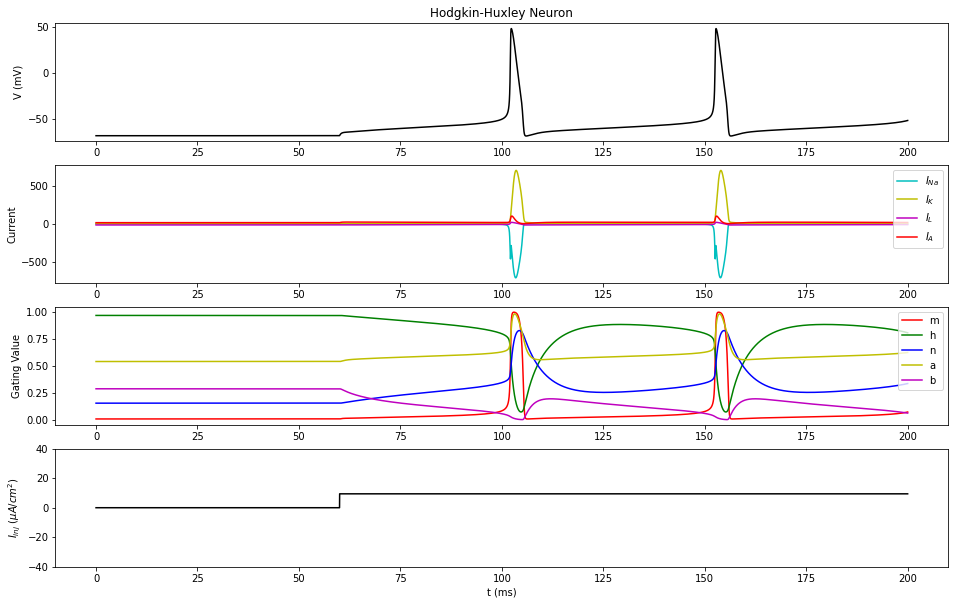

Corrent injetada: 9.399999999999995


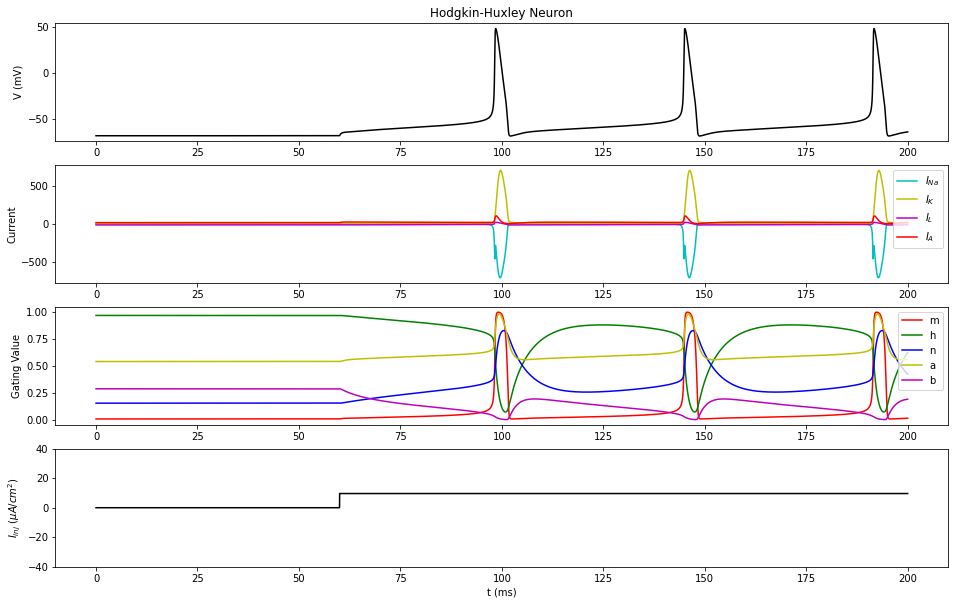

Corrent injetada: 9.599999999999994


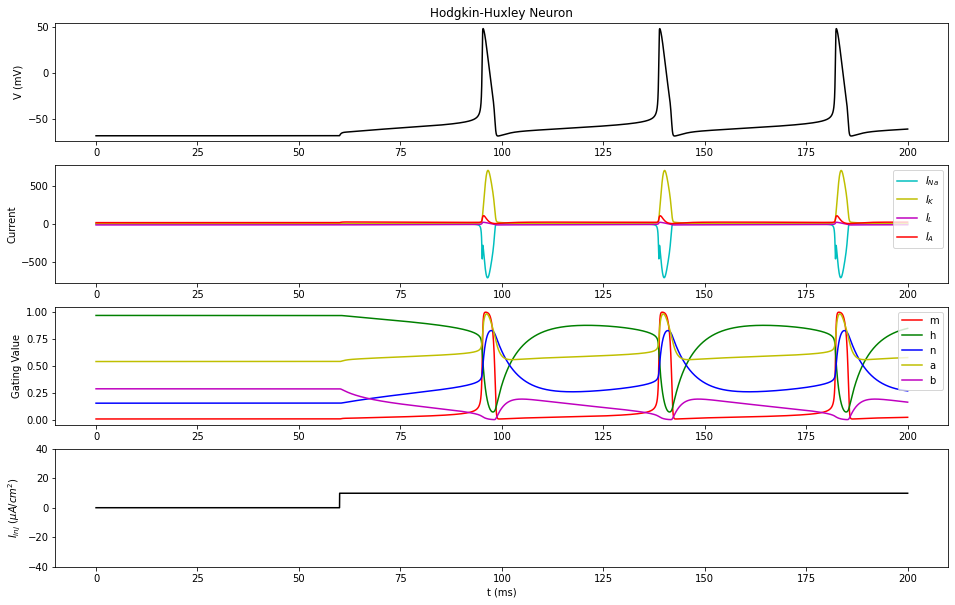

Corrent injetada: 9.799999999999994


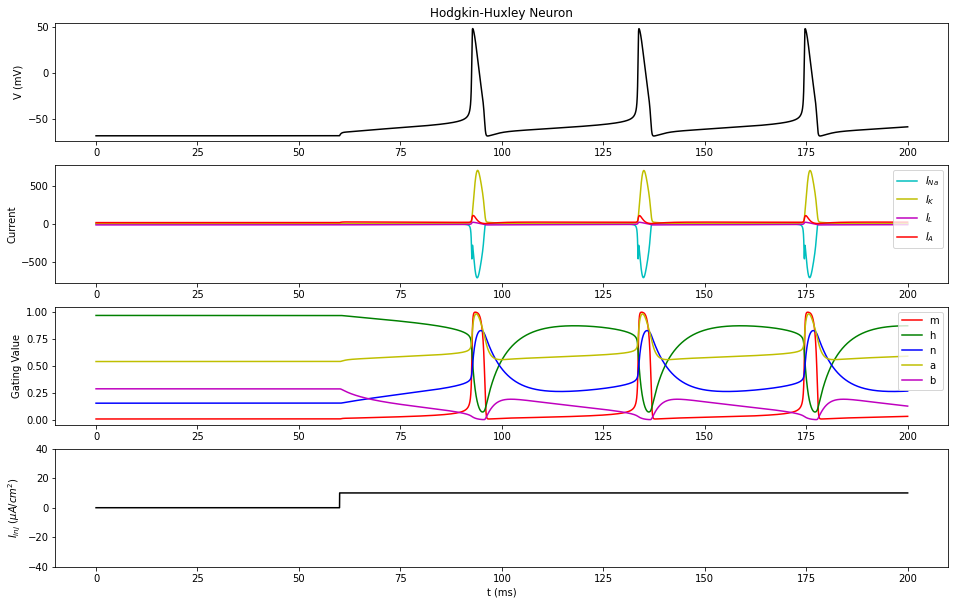

Corrent injetada: 9.999999999999993


In [22]:
runner = ConnorStevens(exp_time=200)

current_inj = np.arange(8, 10.1, 0.2)
all_activation_potencials = []

for j in current_inj:
    V, m, h, n, ina, ik, il, ia, i_inj_values = runner.run(J=[j], times=[(60, 200)], V0=-67.976, plot=False)
    all_activation_potencials.append(get_number_of_action_potencial_by_time(V))
    print(f"Corrent injetada: {j}")

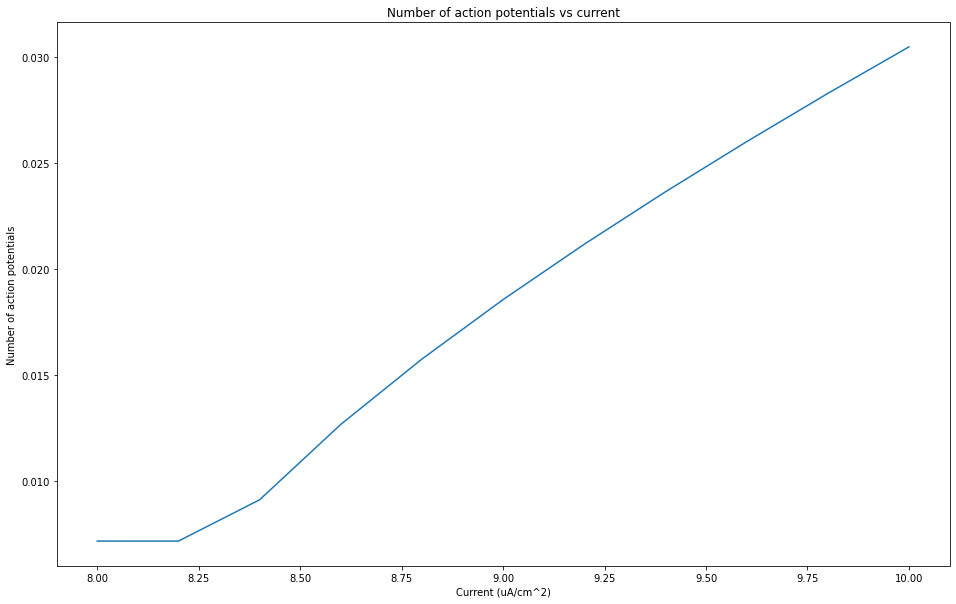

The max number of action potencials was 0.030469226081657533 Hz
The min number of action potencials was 0.007143367383384527 Hz


In [23]:
plt.figure(figsize=(16, 10))
plt.plot(current_inj, np.array(all_activation_potencials))
plt.xlabel("Current (uA/cm^2)")
plt.ylabel("Number of action potentials")
plt.title("Number of action potentials vs current")
plt.show()
print(f"The max number of action potencials was {max(all_activation_potencials)} Hz")
print(f"The min number of action potencials was {min(all_activation_potencials)} Hz")


<div style="font-family: Times New Roman; font-size: 1.0em;">
e) Em t = 60 ms, aplique uma densidade de corrente negativa igual a J = −50 µA/cm 2 por
5 ms (um pulso de corrente negativa) e, em seguida, aplique uma densidade de corrente
constante positiva de J = 20 µA/cm 2 até o fim da simulação. Faça o gráfico de V versus
t para esse caso.
</div>

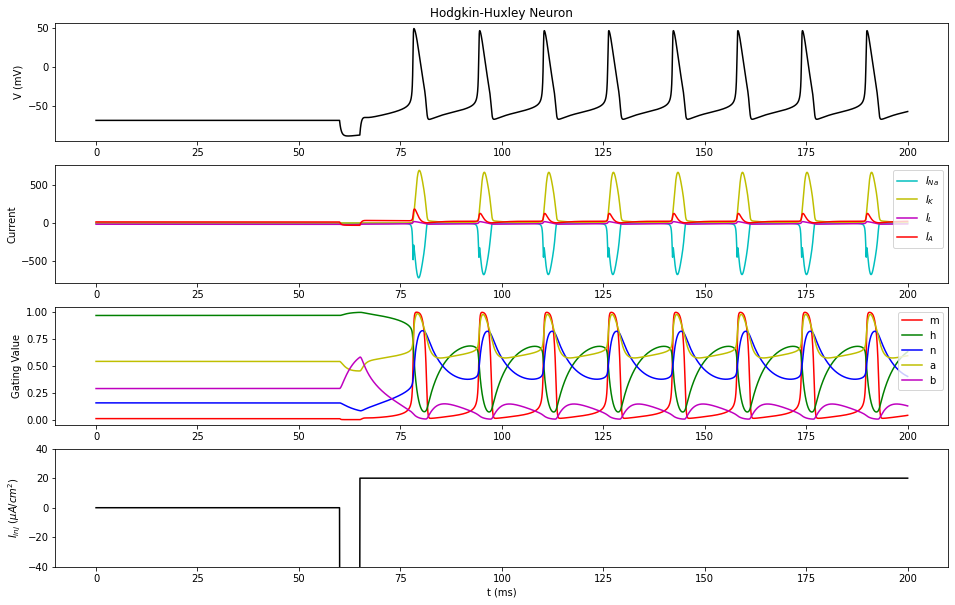

In [24]:
runner = ConnorStevens(exp_time=200)

_ = runner.run(J=[-50.0, 20.0], times=[(60, 65), (65,200)], V0=-67.976)


<div style="font-family: Times New Roman; font-size: 1.0em;">
e) Multiplique o termo do lado direito da equação (6) para db/dt por 0,25 para tornar a
inativação da corrente A mais lenta. Injete uma densidade de corrente J = 15 µA/cm 2 e
faça o gráfico de V versus t. Observe que agora a latência do primeiro disparo torna-se
muito longa, mas o intervalo entre disparos é bem pequeno. Explique o motivo disso.
</div>